### Data preprocessing

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
from sklearn.linear_model import LinearRegression

In [3]:
# Reading the dataset
retail_clean= pd.read_csv('retail_clean.csv')
retail_clean.info()
retail_clean

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 779495 entries, 0 to 779494
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   779495 non-null  int64  
 1   Invoice      779495 non-null  int64  
 2   StockCode    779495 non-null  object 
 3   Description  779495 non-null  object 
 4   Quantity     779495 non-null  int64  
 5   InvoiceDate  779495 non-null  object 
 6   Price        779495 non-null  float64
 7   Customer ID  779495 non-null  float64
 8   Country      779495 non-null  object 
 9   Revenue      779495 non-null  float64
dtypes: float64(3), int64(3), object(4)
memory usage: 59.5+ MB


,Unnamed: 0,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue
0,0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40
1,1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
2,2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
3,3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80
4,4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...,...
779490,1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
779491,1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
779492,1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
779493,1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,14.85


**Analyze patterns within this dataset**

- 10 features: Invoice, StockCode, Description, Quantity, InvoiceDate, Price, Customer ID, Country, Revenue, date.
- Dataset not have any null data
- Need to change the type of InvoiceDate to datetime type


In [4]:
#working with invoicedate column
retail_clean['InvoiceDate']= pd.to_datetime(retail_clean['InvoiceDate'])
retail_clean['date']= retail_clean['InvoiceDate'].dt.strftime("%Y-%m-%d")
retail_clean['date']=pd.to_datetime(retail_clean['date'])

In [5]:
# Let's do a bit of pre-processing
retail_clean['month']= retail_clean.date.dt.month
retail_clean['year']= retail_clean.date.dt.year
retail_clean['week']= retail_clean.date.dt.isocalendar().week
retail_clean

,Unnamed: 0,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue,date,month,year,week
0,0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40,2009-12-01,12,2009,49
1,1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,2009-12-01,12,2009,49
2,2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,2009-12-01,12,2009,49
3,3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80,2009-12-01,12,2009,49
4,4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00,2009-12-01,12,2009,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
779490,1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,2011-12-09,12,2011,49
779491,1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011-12-09,12,2011,49
779492,1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011-12-09,12,2011,49
779493,1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,14.85,2011-12-09,12,2011,49


In [6]:
retail_clean.month.describe()

count    779495.000000
mean          7.417110
std           3.422346
min           1.000000
25%           5.000000
50%           8.000000
75%          11.000000
max          12.000000
Name: month, dtype: float64

### Forecast processing

In [7]:
## Initial division of the dataset
time_series=retail_clean.groupby(['week','year']).agg(date= ('date','first'),
        total_sales=('Quantity',np.sum)).reset_index().sort_values('date')
time_series

,week,year,date,total_sales
96,49,2009,2009-12-01,138612
99,50,2009,2009-12-07,109644
101,51,2009,2009-12-14,125772
103,52,2009,2009-12-21,24680
0,1,2010,2010-01-04,95950
...,...,...,...,...
89,45,2011,2011-11-07,156285
91,46,2011,2011-11-14,156756
93,47,2011,2011-11-21,154179
95,48,2011,2011-11-28,139896


<Axes: xlabel='date', ylabel='total_sales'>

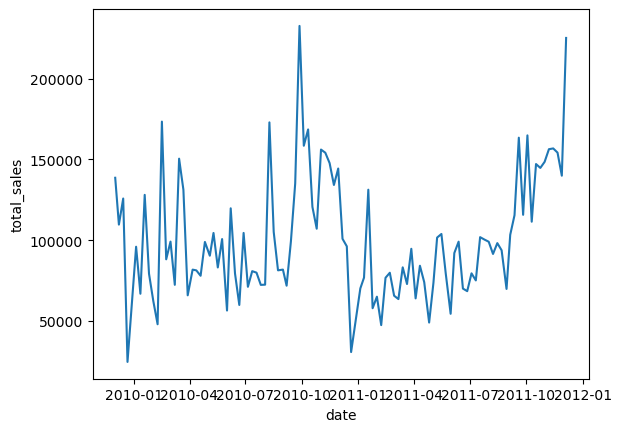

In [8]:
#Sales Trend Over Time
sns.lineplot(x='date', y='total_sales', data=time_series)

In [9]:
from sklearn.linear_model import LinearRegression
time_series['trend']= range(time_series.shape[0])
time_series['month']= time_series['date'].dt.month
time_series

,week,year,date,total_sales,trend,month
96,49,2009,2009-12-01,138612,0,12
99,50,2009,2009-12-07,109644,1,12
101,51,2009,2009-12-14,125772,2,12
103,52,2009,2009-12-21,24680,3,12
0,1,2010,2010-01-04,95950,4,1
...,...,...,...,...,...,...
89,45,2011,2011-11-07,156285,99,11
91,46,2011,2011-11-14,156756,100,11
93,47,2011,2011-11-21,154179,101,11
95,48,2011,2011-11-28,139896,102,11


In [10]:
####dropping columns
X= time_series.drop(['week','year','date','total_sales'],axis=1)
X

,trend,month
96,0,12
99,1,12
101,2,12
103,3,12
0,4,1
...,...,...
89,99,11
91,100,11
93,101,11
95,102,11


In [11]:
names=pd.get_dummies(X, columns=['month']).columns
names

Index(['trend', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5',
       'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11',
       'month_12'],
      dtype='object')

In [12]:
# converting categorical variables in the DataFrame X into dummy variables 
X= pd.get_dummies(X,columns=['month']).values*1
X

array([[0, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 0, 0, 1],
       [2, 0, 0, ..., 0, 0, 1],
       ...,
       [101, 0, 0, ..., 0, 1, 0],
       [102, 0, 0, ..., 0, 1, 0],
       [103, 0, 0, ..., 0, 0, 1]], dtype=object)

In [13]:
y= time_series.total_sales.values
y

array([138612, 109644, 125772,  24680,  95950,  66861, 128040,  79277,
        62355,  47991, 173356,  88169,  99106,  72381, 150427, 131206,
        65892,  81776,  81325,  77985,  98903,  90396, 104455,  83128,
       100685,  56473, 119717,  79410,  59917, 104481,  71145,  80832,
        79908,  72337,  72473, 172881, 105113,  81344,  81798,  71856,
        99271, 135203, 232555, 158435, 168496, 120628, 107099, 156059,
       154106, 147677, 134148, 144315, 100859,  96188,  30785,  70148,
        76829, 131231,  57897,  65037,  47456,  76725,  79855,  65636,
        63560,  83202,  72865,  94672,  63987,  84188,  74047,  49036,
        73587, 101609, 103838,  79532,  54460,  92047,  99089,  70051,
        68459,  79487,  75102, 101869, 100390,  99033,  91482,  98182,
        93744,  69837, 103322, 115456, 163415, 115695, 164837, 111426,
       147103, 144702, 148460, 156285, 156756, 154179, 139896, 225123])

In [14]:
model= LinearRegression()

In [15]:
model.fit(X,y)

LinearRegression()

In [16]:
# Get the parameters of the model
model.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [17]:
# Retrieve the coefficients of trend and demand 
model.coef_

array([-4.47634217e+01, -1.60631385e+04, -2.15047587e+04, -9.04535122e+03,
       -2.49112697e+04, -1.30332714e+04, -1.77597601e+04, -1.81014702e+04,
       -3.94508478e+03,  2.92642756e+04,  4.12288572e+04,  4.92002574e+04,
        4.67071441e+03])

Each element in the array corresponds to the coefficient of a feature in the model.

In [18]:
#Pairing Feature Names with Coefficients
dict1= list(zip(names,model.coef_))
dict1

[('trend', -44.76342173878452),
 ('month_1', -16063.138502228496),
 ('month_2', -21504.758749813464),
 ('month_3', -9045.35121962076),
 ('month_4', -24911.269665033775),
 ('month_5', -13033.271443780171),
 ('month_6', -17759.76007034982),
 ('month_7', -18101.4701824295),
 ('month_8', -3945.084784604961),
 ('month_9', 29264.275613219594),
 ('month_10', 41228.85716780656),
 ('month_11', 49200.257430125785),
 ('month_12', 4670.714406708897)]

In [19]:
prediction= model.predict(X)
prediction

array([107957.44962825, 107912.68620651, 107867.92278477, 107823.15936303,
        87044.54303236,  86999.77961062,  86955.01618888,  86910.25276714,
        81423.86909782,  81379.10567608,  81334.34225434,  81289.5788326 ,
        93704.22294105,  93659.45951932,  93614.69609758,  93569.93267584,
        93525.1692541 ,  77614.48738695,  77569.72396521,  77524.96054347,
        77480.19712173,  89313.43192125,  89268.66849951,  89223.90507777,
        89179.14165603,  84407.88960772,  84363.12618598,  84318.36276424,
        84273.5993425 ,  84228.83592077,  83842.36238695,  83797.59896521,
        83752.83554347,  83708.07212173,  97819.69409782,  97774.93067608,
        97730.16725434,  97685.4038326 ,  97640.64041086, 130805.23738695,
       130760.47396521, 130715.71054347, 130670.94712173, 142590.76525458,
       142546.00183284, 142501.2384111 , 142456.47498936, 150383.11182994,
       150338.3484082 , 150293.58498647, 150248.82156473, 150204.05814299,
       105629.75169783, 1

The predict() method takes the input data X and returns the predicted values based on machine learning model. Each element in the resulting prediction array corresponds to the predicted value for a single data point in X.

In [20]:
time_series['prediction']= prediction
time_series

,week,year,date,total_sales,trend,month,prediction
96,49,2009,2009-12-01,138612,0,12,107957.449628
99,50,2009,2009-12-07,109644,1,12,107912.686207
101,51,2009,2009-12-14,125772,2,12,107867.922785
103,52,2009,2009-12-21,24680,3,12,107823.159363
0,1,2010,2010-01-04,95950,4,1,87044.543032
...,...,...,...,...,...,...,...
89,45,2011,2011-11-07,156285,99,11,148055.413900
91,46,2011,2011-11-14,156756,100,11,148010.650478
93,47,2011,2011-11-21,154179,101,11,147965.887056
95,48,2011,2011-11-28,139896,102,11,147921.123634


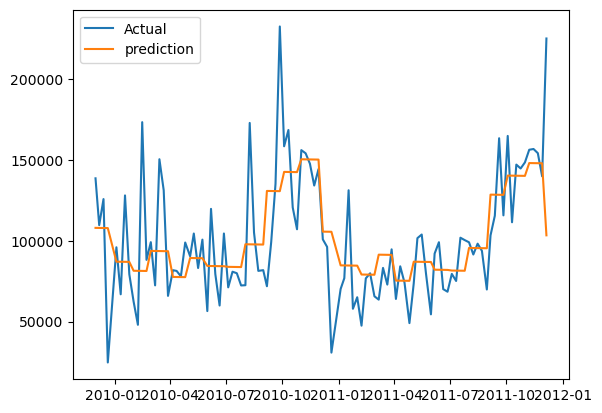

In [21]:
import matplotlib.pyplot as plt
plt.plot(time_series.date,time_series.total_sales,label='Actual')
plt.plot(time_series.date,time_series.prediction,label='prediction')
plt.legend(loc='upper left')
plt.show()

In [22]:
#forecasting

time_series=retail_clean.groupby(['week','month','year']).agg(date= ('date','first'),
        total_sales=('Quantity',np.sum)).reset_index().sort_values('date')
time_series

,week,month,year,date,total_sales
113,49,12,2009,2009-12-01,138612
116,50,12,2009,2009-12-07,109644
118,51,12,2009,2009-12-14,125772
120,52,12,2009,2009-12-21,24680
0,1,1,2010,2010-01-04,95950
...,...,...,...,...,...
106,46,11,2011,2011-11-14,156756
108,47,11,2011,2011-11-21,154179
110,48,11,2011,2011-11-28,78241
112,48,12,2011,2011-12-01,61655


In [23]:
max_date= time_series.date.max()
max_date

Timestamp('2011-12-05 00:00:00')

In [24]:
dates= pd.DataFrame({'date':pd.date_range('2011-12-12','2012-08-5',freq='W')})
dates

,date
0,2011-12-18
1,2011-12-25
2,2012-01-01
3,2012-01-08
4,2012-01-15
5,2012-01-22
6,2012-01-29
7,2012-02-05
8,2012-02-12
9,2012-02-19


In [25]:
time_series= pd.concat([time_series,dates],axis=0)
time_series['trend']= range(time_series.shape[0])
time_series['month']= time_series['date'].dt.month
time_series['month']= time_series['month'].astype('category')

In [26]:
time_series

,week,month,year,date,total_sales,trend
113,49,12,2009.0,2009-12-01,138612.0,0
116,50,12,2009.0,2009-12-07,109644.0,1
118,51,12,2009.0,2009-12-14,125772.0,2
120,52,12,2009.0,2009-12-21,24680.0,3
0,1,1,2010.0,2010-01-04,95950.0,4
...,...,...,...,...,...,...
29,<NA>,7,NaN,2012-07-08,NaN,150
30,<NA>,7,NaN,2012-07-15,NaN,151
31,<NA>,7,NaN,2012-07-22,NaN,152
32,<NA>,7,NaN,2012-07-29,NaN,153


In [27]:
X= time_series.drop(['week','year','date','total_sales'],axis=1)
X

,month,trend
113,12,0
116,12,1
118,12,2
120,12,3
0,1,4
...,...,...
29,7,150
30,7,151
31,7,152
32,7,153


In [28]:
names=pd.get_dummies(X).columns
X= pd.get_dummies(X).values*1
y= time_series.total_sales.values
X

array([[0, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 0, 0, 1],
       [2, 0, 0, ..., 0, 0, 1],
       ...,
       [152, 0, 0, ..., 0, 0, 0],
       [153, 0, 0, ..., 0, 0, 0],
       [154, 0, 0, ..., 0, 0, 0]], dtype=object)

In [29]:
prediction= model.predict(X)
prediction

array([107957.44962825, 107912.68620651, 107867.92278477, 107823.15936303,
        87044.54303236,  86999.77961062,  86955.01618888,  86910.25276714,
        81423.86909782,  81379.10567608,  81334.34225434,  81289.5788326 ,
        93704.22294105,  93659.45951932,  93614.69609758,  93569.93267584,
        93525.1692541 ,  77614.48738695,  77569.72396521,  77524.96054347,
        77480.19712173,  77435.43369999,  89268.66849951,  89223.90507777,
        89179.14165603,  89134.37823429,  89089.61481255,  84318.36276424,
        84273.5993425 ,  84228.83592077,  84184.07249903,  84139.30907729,
        83752.83554347,  83708.07212173,  83663.30869999,  83618.54527825,
        83573.78185651,  97685.4038326 ,  97640.64041086,  97595.87698912,
        97551.11356738,  97506.35014565,  97461.58672391, 130626.18369999,
       130581.42027825, 130536.65685651, 130491.89343478, 130447.13001304,
       142366.94814589, 142322.18472415, 142277.42130241, 142232.65788067,
       142187.89445893, 1

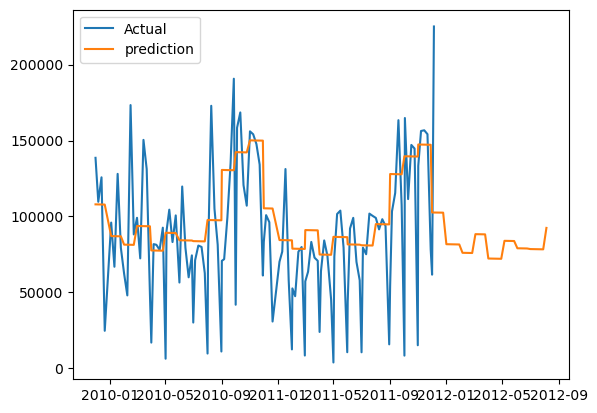

In [30]:
time_series['prediction']= prediction
plt.plot(time_series.date,time_series.total_sales,label='Actual')
plt.plot(time_series.date,time_series.prediction,label='prediction')
plt.legend(loc='upper left')
plt.show()

In [31]:
#sale prediction from 2011-12-12 to 2012-08-5 
sale_prediction= pd.merge(dates, time_series[['date','prediction']], on='date', how='left')
sale_prediction

,date,prediction
0,2011-12-18,102541.075598
1,2011-12-25,102496.312176
2,2012-01-01,81717.695845
3,2012-01-08,81672.932424
4,2012-01-15,81628.169002
5,2012-01-22,81583.405580
6,2012-01-29,81538.642158
7,2012-02-05,76052.258489
8,2012-02-12,76007.495067
9,2012-02-19,75962.731646


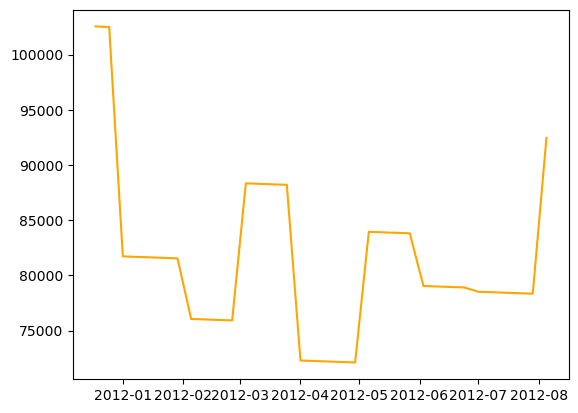

In [32]:
plt.plot(sale_prediction.date,sale_prediction.prediction,color='orange')